In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

# from matplotlib import rc
# rc('text', usetex=True)

from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.pipeline import make_pipeline
from sklearn.decomposition.pca import PCA
from sklearn.preprocessing import scale, StandardScaler

from IPython.display import display

%matplotlib inline

#### Import the decennial Census data (tract level), calculated in `run_historic_tracts.py`.  Get a list of the available objective functionns.

In [2]:
c = pd.read_csv("data/decennial_compactness.csv")
cols = list(c.filter(regex = "^obj").columns)

#### Run the PCA with all objectives included and no pre-normalization of the variances.  69% explained.

In [3]:
pca = PCA()
pca.fit(c[cols])
print(pca.explained_variance_ratio_[:3])

[0.69464538 0.14131356 0.05227658]


#### With StandardScaler: 60% explained.

In [4]:
pca_norm = make_pipeline(StandardScaler(), PCA())
pca_norm.fit(c[cols])
print(pca_norm.steps[-1][1].explained_variance_ratio_[:3])

[0.60108539 0.10319783 0.08383222]


#### Axis ratio does not work very well; what is its impact on the explained variance?

In [5]:
if 0: # Drop Axis Ratio -- what's the change?  3%.
    mod_cols = ['obj_ip_dist', 'obj_inertia_p', 'obj_lic', 'obj_scc', 
                'obj_inertia_a', 'obj_mean_radius', 
                'obj_dyn_radius', 
                "obj_exchange", 'obj_rohrbach', 
                'obj_hull_area', 'obj_polsby', 'obj_harm_radius', 'obj_hull_pop']#, 'obj_axis']

    pca.fit(c[mod_cols])
    print(pca.explained_variance_ratio_[:3])

#### Now save the first two components for the correlation plot.

In [6]:
pca.fit(c[cols])
c['obj_pca1'] = pca.transform(c[cols])[:,0]
c['obj_pca2'] = pca.transform(c[cols])[:,1]

In [7]:
print(list(c.filter(regex = "^obj").columns))

['obj_ip_dist', 'obj_polsby', 'obj_lic', 'obj_scc', 'obj_inertia_a', 'obj_inertia_p', 'obj_mean_radius', 'obj_harm_radius', 'obj_dyn_radius', 'obj_axis', 'obj_exchange', 'obj_hull_pop', 'obj_hull_area', 'obj_rohrbach', 'obj_pca1', 'obj_pca2']


,obj_pca1,obj_pca2
obj_pca1,1.000000e+00,2.390702e-14
obj_inertia_p,9.722057e-01,2.246718e-01
obj_ip_dist,9.549916e-01,1.420450e-01
obj_scc,7.586392e-01,4.589146e-01
obj_inertia_a,6.934753e-01,6.561568e-01
obj_dyn_radius,6.853531e-01,6.816443e-01
obj_mean_radius,6.709605e-01,6.784408e-01
obj_rohrbach,6.597447e-01,4.763163e-01
obj_exchange,5.935046e-01,7.234227e-01
obj_lic,5.273478e-01,6.248382e-01


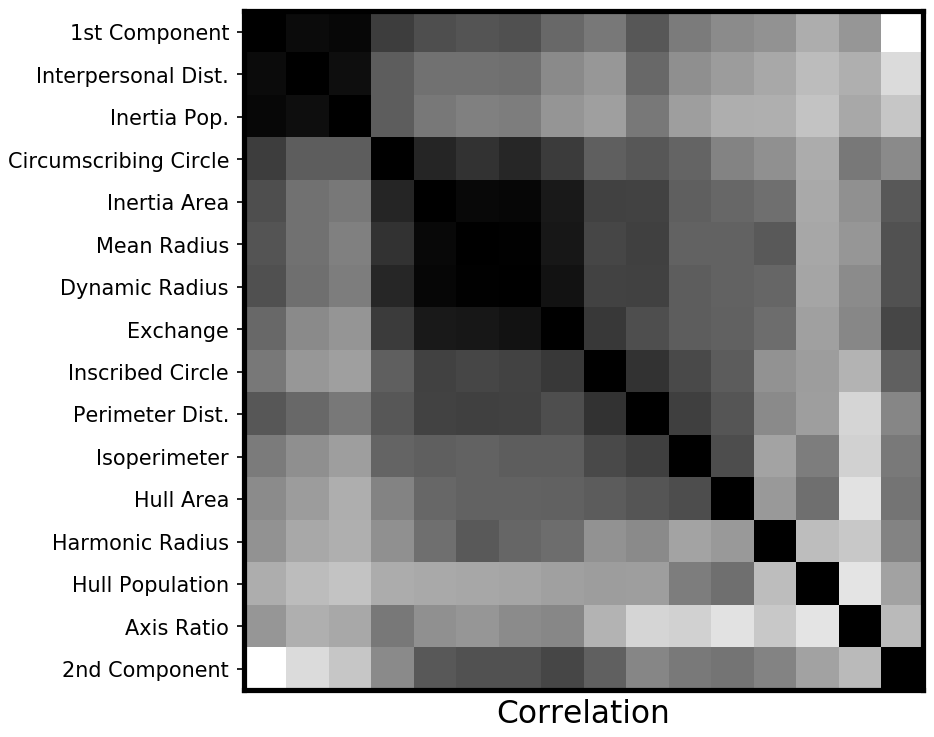

In [8]:
# Set my own ordering -- "manual" block diagonalization of correlation structure.
cols = ['obj_pca1', 'obj_ip_dist', 'obj_inertia_p', 'obj_scc', 'obj_inertia_a', 'obj_mean_radius', 
        'obj_dyn_radius', "obj_exchange", 'obj_lic', 'obj_rohrbach', 'obj_polsby', 'obj_hull_area', 'obj_harm_radius', 'obj_hull_pop', 
        'obj_axis', 'obj_pca2']

names = ["1st Component", "Interpersonal Dist.", "Inertia Pop.", "Circumscribing Circle", "Inertia Area", "Mean Radius", 
         'Dynamic Radius', "Exchange", "Inscribed Circle", "Perimeter Dist.", "Isoperimeter", "Hull Area", "Harmonic Radius", "Hull Population",  
         "Axis Ratio", "2nd Component"]

# Calculate correlations.
correlations = c[cols].corr()
display(correlations[["obj_pca1", "obj_pca2"]].abs().sort_values(by = "obj_pca1", ascending = False))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

cax = ax.matshow(np.abs(correlations), vmin=0, vmax=1, cmap = "gray_r")

divider = make_axes_locatable(ax)
# caxd = divider.append_axes("right", size="5%", pad=0.15)
# fig.colorbar(cax, cax=caxd)

ticks = np.arange(0,len(cols),1)
ax.set_xlabel("Correlation", size = 15)
ax.set_xticks([])
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

ax.get_figure().savefig("paper_figs/historic_correlation.pdf", bbox_inches='tight', pad_inches=0.1)

,obj_pca1,obj_pca2
obj_pca1,1.000000e+00,2.390702e-14
obj_inertia_p,9.722057e-01,2.246718e-01
obj_ip_dist,9.549916e-01,1.420450e-01
obj_scc,7.586392e-01,4.589146e-01
obj_inertia_a,6.934753e-01,6.561568e-01
obj_dyn_radius,6.853531e-01,6.816443e-01
obj_mean_radius,6.709605e-01,6.784408e-01
obj_rohrbach,6.597447e-01,4.763163e-01
obj_exchange,5.935046e-01,7.234227e-01
obj_lic,5.273478e-01,6.248382e-01


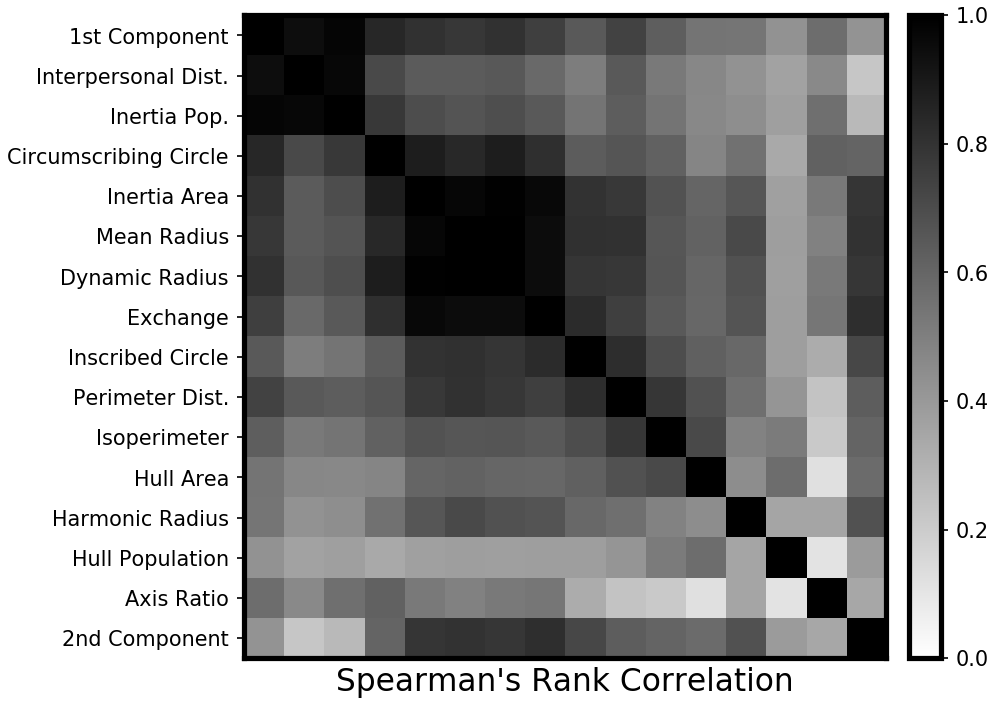

In [9]:
spcorr = c[cols].corr(method = "spearman")
display(correlations[["obj_pca1", "obj_pca2"]].abs().sort_values(by = "obj_pca1", ascending = False))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(spcorr), vmin=0, vmax=1, cmap = "gray_r")

divider = make_axes_locatable(ax)
caxd = divider.append_axes("right", size="5%", pad=0.15)
fig.colorbar(cax, cax=caxd)

ticks = np.arange(0,len(cols),1)
ax.set_xlabel("Spearman's Rank Correlation", size = 15)
ax.set_xticks([])
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(names)
plt.show()

ax.get_figure().savefig("paper_figs/historic_spearmans.pdf", bbox_inches='tight', pad_inches=0.1)

#### Now list and plot the worst few districts.

In [10]:
c = gpd.read_file("data/decennial_compactness.shp")

pca = PCA(n_components = 2)
pca.fit(c.filter(regex = "^obj"))

obj_cols = list(c.filter(regex = "^obj").columns)
c['obj_pca1'] = pca.transform(scale(c[obj_cols]))[:,0]
c['obj_pca2'] = pca.transform(scale(c[obj_cols]))[:,1]

pd.options.display.max_columns = 100

cols = list(c.filter(regex = "^obj").columns)
c = c[c.year == 2010].sort_values(by = "obj_pca1", ascending = True).reset_index()
c[['usps', 'cd', 'year', 'congress'] + cols].head(20)

,usps,cd,year,congress,obj_ip_dis,obj_polsby,obj_lic,obj_scc,obj_inerti,obj_iner_1,obj_mean_r,obj_harm_r,obj_dyn_ra,obj_axis,obj_exchan,obj_hull_p,obj_hull_a,obj_rohrba,obj_pca1,obj_pca2
0,NC,12,2010,114,0.310576,0.030455,0.076874,0.075737,0.090944,0.069804,0.322113,0.478799,0.309563,0.026780,0.184238,0.409797,0.249931,0.218597,-7.540050,8.574199
1,OH,9,2010,114,0.246838,0.038437,0.098734,0.057094,0.100508,0.048557,0.350742,0.813148,0.306280,0.005466,0.296702,0.632188,0.554415,0.266564,-7.011343,6.895047
2,NY,10,2010,114,0.373565,0.076937,0.117431,0.104140,0.131973,0.113109,0.372312,0.417531,0.361098,0.026612,0.201237,0.389464,0.434102,0.320920,-7.000619,7.774153
3,FL,5,2010,114,0.315223,0.039870,0.093387,0.100401,0.201684,0.083048,0.462493,0.574790,0.429493,0.042168,0.242171,0.330266,0.286059,0.276483,-6.974892,7.411777
4,TX,35,2010,114,0.353801,0.056027,0.164879,0.101185,0.134891,0.088063,0.439062,0.625423,0.384845,0.012738,0.421953,0.444744,0.364177,0.412243,-6.600400,6.647565
5,HI,2,2010,114,0.343898,0.081139,0.416271,0.054400,0.087771,0.093948,0.339472,0.343578,0.296678,0.023765,0.175535,0.498477,0.965851,0.530970,-6.529127,6.401881
6,FL,22,2010,114,0.432778,0.074099,0.133099,0.109869,0.157550,0.155312,0.438825,0.669790,0.400244,0.035331,0.345536,0.420148,0.458124,0.279545,-6.468928,6.817694
7,MD,6,2010,114,0.607832,0.077824,0.189248,0.151140,0.166476,0.252565,0.413027,0.402451,0.407386,0.081366,0.187924,0.780515,0.849620,0.425128,-5.759332,6.259720
8,TX,33,2010,114,0.548413,0.047630,0.192086,0.247767,0.290340,0.262478,0.546625,0.536481,0.539987,0.099948,0.331605,0.432009,0.429613,0.326195,-5.676683,6.045438
9,TX,14,2010,114,0.545488,0.093397,0.270146,0.212222,0.215882,0.239207,0.471068,0.505943,0.464938,0.041262,0.234656,0.521571,0.661428,0.518019,-5.643399,5.863989


{'cd': 12, 'usps': 'NC'}


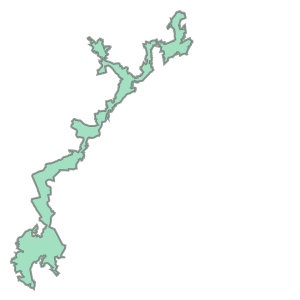

{'cd': 9, 'usps': 'OH'}


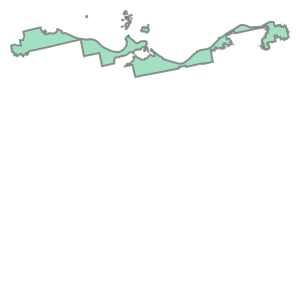

{'cd': 10, 'usps': 'NY'}


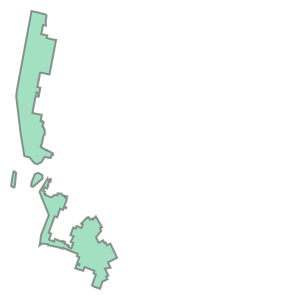

{'cd': 5, 'usps': 'FL'}


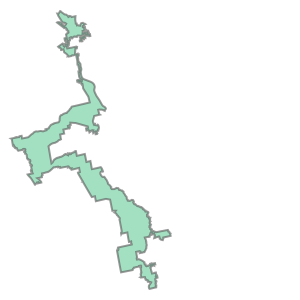

{'cd': 35, 'usps': 'TX'}


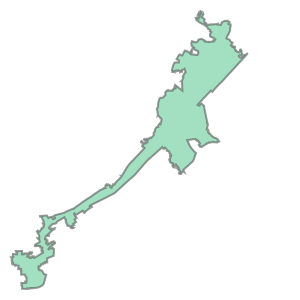

In [11]:
for ri, row in c.head(5).iterrows():
    print(row[["usps", "cd"]].to_dict())
    display(row.geometry)